In [2]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve


import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False


In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


feature: pclass, sex, fare
label: survived
1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 
2. train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.



5~ 8 .titanic 통계값을 구하시요(문제는 자율)


In [3]:
# feature: pclass, sex, fare
# label: survived
x_data = titanic[['pclass', 'sex', 'fare']]
x_data = pd.get_dummies(x_data, columns=['sex'])
x_data = x_data.drop('sex_male', axis=1)
x_data

y_data = titanic[['survived']]

In [4]:
x_data

,pclass,fare,sex_female
0,3,7.2500,0
1,1,71.2833,1
2,3,7.9250,1
3,1,53.1000,1
4,3,8.0500,0
...,...,...,...
886,2,13.0000,0
887,1,30.0000,1
888,3,23.4500,1
889,1,30.0000,0


In [5]:
y_data

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,stratify=y_data, 
                                                    random_state=1)

In [7]:
x_train

,pclass,fare,sex_female
368,3,7.7500,1
542,3,31.2750,1
49,3,17.8000,1
667,3,7.7750,0
297,1,151.5500,1
...,...,...,...
650,3,7.8958,0
744,3,7.9250,0
265,2,10.5000,0
337,1,134.5000,1


In [8]:
x_test

,pclass,fare,sex_female
232,2,13.5000,0
54,1,61.9792,0
277,2,0.0000,0
385,2,73.5000,0
75,3,7.6500,0
...,...,...,...
593,3,7.7500,1
517,3,24.1500,0
443,2,13.0000,1
116,3,7.7500,0


In [9]:
model_logi = make_pipeline(StandardScaler(),LogisticRegression() ) # 단위가 다르기 때문에, 스케일 해줘야 함
model_logi.fit(x_train, y_train)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

1. 등급, female, 32달러인 경우 생사유무 예측

In [10]:
model_logi.predict_proba([[1, 32, 1]]).argmax(axis=1)
# 결과 1 : 생존

array([1], dtype=int64)

2. train, test, f1 score

In [11]:
y_test_pred = model_logi.predict(x_test)
print('test f1 score:', f1_score(y_test, y_test_pred))
# print('train f1 score: ', )

test f1 score: 0.7407407407407408


In [12]:
y_train_pred = model_logi.predict(x_train)
print('train f1 score: ', f1_score(y_train, y_train_pred))

train f1 score:  0.7074569789674952


3. confusion matrix 를 구하고 heatmap 을 그리시요.

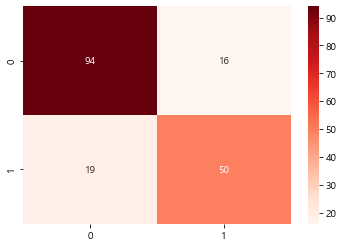

In [13]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.show()

4. roc curve 를 그리시요.

In [14]:
p = model_logi.predict_proba(x_test)
p

array([[0.78086592, 0.21913408],
       [0.56404248, 0.43595752],
       [0.78311234, 0.21688766],
       [0.7706801 , 0.2293199 ],
       [0.90397954, 0.09602046],
       [0.78094941, 0.21905059],
       [0.90326123, 0.09673877],
       [0.40648651, 0.59351349],
       [0.78136656, 0.21863344],
       [0.90396224, 0.09603776],
       [0.08670818, 0.91329182],
       [0.4072815 , 0.5927185 ],
       [0.57265775, 0.42734225],
       [0.9026497 , 0.0973503 ],
       [0.05843196, 0.94156804],
       [0.56187616, 0.43812384],
       [0.90397106, 0.09602894],
       [0.20764557, 0.79235443],
       [0.4120379 , 0.5879621 ],
       [0.78136656, 0.21863344],
       [0.90395624, 0.09604376],
       [0.90395871, 0.09604129],
       [0.08095778, 0.91904222],
       [0.90394564, 0.09605436],
       [0.77860281, 0.22139719],
       [0.90462572, 0.09537428],
       [0.20700394, 0.79299606],
       [0.20966013, 0.79033987],
       [0.89976069, 0.10023931],
       [0.9036748 , 0.0963252 ],
       [0.

In [15]:
df = pd.DataFrame(y_test)
df

,survived
232,0
54,0
277,0
385,0
75,0
...,...
593,0
517,0
443,1
116,0


In [16]:
df['proba'] = p[:,-1]
df

,survived,proba
232,0,0.219134
54,0,0.435958
277,0,0.216888
385,0,0.229320
75,0,0.096020
...,...,...
593,0,0.587962
517,0,0.097428
443,1,0.790259
116,0,0.096029


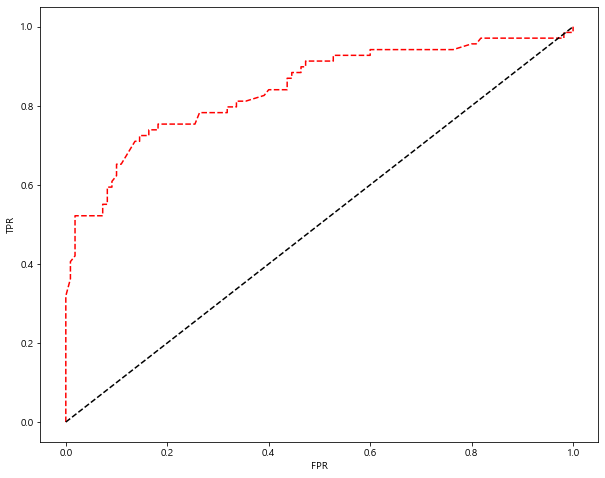

In [17]:
# roc_curve(y_test, p[:,-1]) # 실제값, 확률값
fpr, tpr, thresholds = roc_curve(df['survived'].values, df['proba'].values) # 실제값(y_true), 확률값(y_score)
# print(fpr) # False Positive Rate
# print(tpr) # True Positive Rate
# print(thresholds)

plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
# # 중간 정도 지나가면 어느 정도 판별력이 있는것으로 판단

5. 클래스별, 남녀 생존율

C:\Users\medici\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


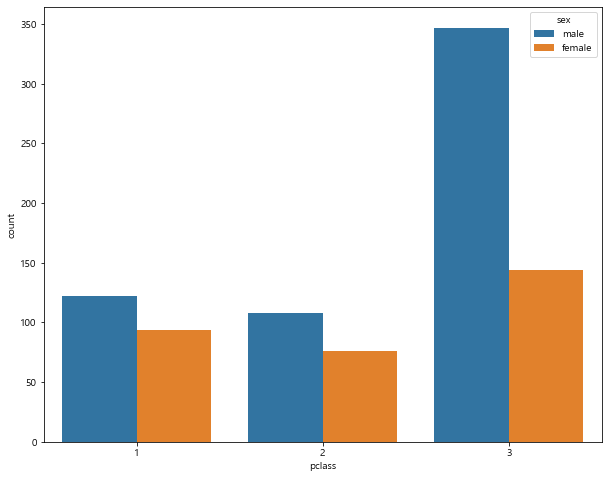

In [23]:
# 5. 클래스별, 남녀 생존율
df = titanic[['pclass','sex','fare','survived']]
x_data = titanic[['pclass','sex','fare']]
y_data = titanic['survived']


plt.figure(figsize = (10,8))
sns.countplot(df['pclass'], hue=df['sex'])

plt.show()

6. 성별로 생존자의 비율을 확인 및 성별 별로 생존자와 사망자 수 예측

In [35]:
# 성별과 생존자 확인
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

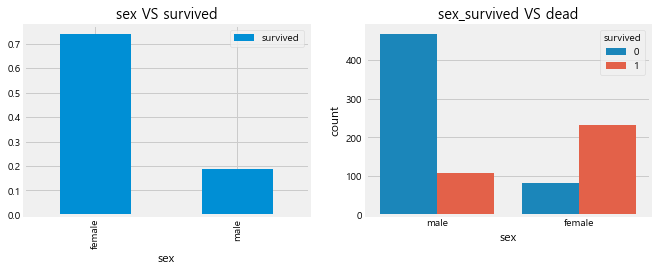

In [42]:
fig,ax = plt.subplots(1,2,figsize=(10,3.5))
titanic[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('sex VS survived')
sns.countplot('sex',hue='survived',data=data,ax=ax[1])
ax[1].set_title('sex_survived VS dead')
plt.show

In [40]:
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

- 성별로 여성이 70% 이상 남성보다 더 살아남.
- 성별로 남성은 100명 정도 생존, 400명 이상 사망
- 여성은 200명 이상 생존, 100명 이하 사망

 7. 연령별, 생존율

In [4]:
df = titanic[['survived', 'age']]
df_r = df.dropna(axis=0)
df_r

,survived,age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
885,0,39.0
886,0,27.0
887,1,19.0
889,1,26.0


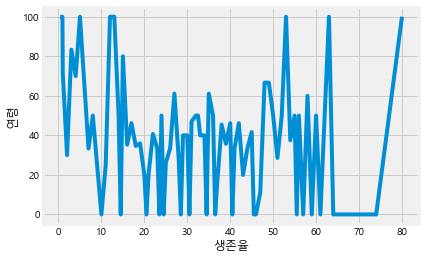

In [5]:
df_r.groupby('age').mean()
plt.xlabel('생존율')
plt.ylabel('연령')
plt.plot(df_r.groupby('age').mean()*100)

plt.show()

8. fare 구간별 생존율 비교

In [54]:
df = titanic[['pclass', 'fare', 'survived']]

In [56]:
k=pd.DataFrame(df['fare'].value_counts())
k.columns=['count']
k=k.reset_index().rename(columns={"index":"fare"})
k.sort_values(by='fare')

,fare,count
8,0.0000,15
238,4.0125,1
160,5.0000,1
157,6.2375,1
241,6.4375,1
...,...,...
59,227.5250,4
147,247.5208,2
111,262.3750,2
53,263.0000,4


In [61]:
f=df['fare'].values
df['fare_c']=np.select([f<=50,f<=100,f<=150,f<=200,f>200],
                       ['0~50','51~100','101~150','151~200','201~'])

In [62]:
df.groupby('fare_c').mean('survived').sort_values('fare')

,pclass,fare,survived
fare_c,,,
0~50,2.547196,15.547793,0.318741
51~100,1.327103,69.306270,0.654206
101~150,1.000000,122.093738,0.791667
151~200,1.000000,155.146767,0.666667
201~,1.000000,279.308545,0.700000
